In [65]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection, metrics
import seaborn as sns

In [66]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer

In [67]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(
    ['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 4292 non-null   float64
 1   numimage              4292 non-null   float64
 2   condition             2666 non-null   float64
 3   bicycleframematerial  4292 non-null   object 
 4   bicycletype           4292 non-null   object 
 5   braketype             4292 non-null   object 
 6   electricassist        4292 non-null   int64  
 7   framesize             1731 non-null   float64
 8   handlebartype         4292 non-null   object 
 9   suspension            4292 non-null   int64  
 10  wheelsize             1920 non-null   float64
 11  sizedimensions        4292 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 402.5+ KB


In [68]:
df = df[(10 < df.price) & (df.price < 3000)
        ].reset_index().drop(['index'], axis=1)
df

,price,numimage,condition,bicycleframematerial,bicycletype,braketype,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions
0,30.0,6.0,4.0,unknown,unknown,unknown,0,NaN,unknown,0,NaN,0
1,112.0,4.0,4.0,unknown,track,unknown,0,NaN,unknown,0,NaN,0
2,167.0,7.0,4.0,unknown,track,unknown,0,NaN,unknown,0,NaN,0
3,125.0,9.0,3.0,aluminum,mountain,special,0,2.0,special,1,26.0,0
4,75.0,0.0,1.0,aluminum,mountain,mechanical,0,NaN,unknown,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4185,75.0,2.0,NaN,unknown,unknown,unknown,0,3.0,unknown,0,26.0,0
4186,100.0,2.0,2.0,aluminum,mountain,mechanical,0,3.0,unknown,0,24.0,0
4187,110.0,10.0,3.0,unknown,unknown,unknown,0,NaN,unknown,0,NaN,0
4188,50.0,3.0,4.0,unknown,unknown,unknown,0,NaN,unknown,0,NaN,0


In [69]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190 entries, 0 to 4189
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              4190 non-null   float64
 1   numimage                           4190 non-null   float64
 2   condition                          2610 non-null   float64
 3   electricassist                     4190 non-null   int64  
 4   framesize                          1705 non-null   float64
 5   suspension                         4190 non-null   int64  
 6   wheelsize                          1896 non-null   float64
 7   sizedimensions                     4190 non-null   int64  
 8   bicycleframematerial_alloy         4190 non-null   uint8  
 9   bicycleframematerial_aluminum      4190 non-null   uint8  
 10  bicycleframematerial_carbon fiber  4190 non-null   uint8  
 11  bicycleframematerial_composite     4190 non-null   uint8

In [70]:
X = pd.get_dummies(df.drop(columns=['price']))
display(X)
y = df.price

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25,random_state=52)

,numimage,condition,electricassist,framesize,suspension,wheelsize,sizedimensions,bicycleframematerial_alloy,bicycleframematerial_aluminum,bicycleframematerial_carbon fiber,...,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,handlebartype_special,handlebartype_unknown
0,6.0,4.0,0,NaN,0,NaN,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,4.0,4.0,0,NaN,0,NaN,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,7.0,4.0,0,NaN,0,NaN,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,9.0,3.0,0,2.0,1,26.0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0.0,1.0,0,NaN,0,NaN,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,2.0,NaN,0,3.0,0,26.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4186,2.0,2.0,0,3.0,0,24.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4187,10.0,3.0,0,NaN,0,NaN,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4188,3.0,4.0,0,NaN,0,NaN,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


### Preprocessing (scaling)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

x_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

X_train, X_test

(      numimage  condition  electricassist  framesize  suspension  wheelsize  \
 0     0.500000        NaN             0.0        NaN         0.0        NaN   
 1     0.083333   1.000000             0.0        1.0         0.0   0.894737   
 2     0.125000   1.000000             0.0        NaN         0.0        NaN   
 3     0.125000   0.666667             0.0        NaN         0.0        NaN   
 4     0.291667        NaN             0.0        NaN         0.0        NaN   
 ...        ...        ...             ...        ...         ...        ...   
 3137  0.083333   0.666667             0.0        NaN         0.0        NaN   
 3138  0.166667        NaN             0.0        1.0         0.0   0.894737   
 3139  0.250000   0.666667             0.0        NaN         0.0        NaN   
 3140  0.500000   1.000000             0.0        NaN         0.0   0.842105   
 3141  0.625000   1.000000             0.0        NaN         0.0        NaN   
 
       sizedimensions  bicycleframemat

### Preprocessing (inputing)

In [72]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = pd.DataFrame(data=imp_mean.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=imp_mean.fit_transform(X_test), columns=X_test.columns)

X_train

,numimage,condition,electricassist,framesize,suspension,wheelsize,sizedimensions,bicycleframematerial_alloy,bicycleframematerial_aluminum,bicycleframematerial_carbon fiber,...,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,handlebartype_special,handlebartype_unknown
0,0.500000,0.873740,0.0,0.661316,0.0,0.721591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.083333,1.000000,0.0,1.000000,0.0,0.894737,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.125000,1.000000,0.0,0.661316,0.0,0.721591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.125000,0.666667,0.0,0.661316,0.0,0.721591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.291667,0.873740,0.0,0.661316,0.0,0.721591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.083333,0.666667,0.0,0.661316,0.0,0.721591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3138,0.166667,0.873740,0.0,1.000000,0.0,0.894737,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3139,0.250000,0.666667,0.0,0.661316,0.0,0.721591,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3140,0.500000,1.000000,0.0,0.661316,0.0,0.842105,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Linear Regression

In [73]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [74]:
linear_regression.intercept_

419.29429275783167

In [75]:
linear_regression.coef_

array([ 378.29394036,  181.06877876,  747.54503276,   78.18803207,
       -163.08111906,  211.95580208, -122.8942365 , -157.90087   ,
        -78.16155385,  648.3160007 , -340.73011972,  253.88706249,
       -156.33018583,  -45.13740386, -123.94292995,  -32.3232255 ,
         48.97330286, -179.02894079,  194.10999829,  -19.29410862,
        220.45484583,  -74.54543881, -199.98931549,  -95.80660874,
        155.7557077 ,  -24.39975902,  187.35044334,  -21.89305149,
       -110.85095399,  -48.51289558,  629.90216163,  -14.80375507,
       -294.07618998, -321.02221657,  -29.31627316,   29.31627316])

In [76]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_, len(linear_regression.coef_))
# The mean squared error
print("RMSE: %.2f" %
      sqrt(np.mean((linear_regression.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regression.score(X_test, y_test))

Coefficients: 
 [ 378.29394036  181.06877876  747.54503276   78.18803207 -163.08111906
  211.95580208 -122.8942365  -157.90087     -78.16155385  648.3160007
 -340.73011972  253.88706249 -156.33018583  -45.13740386 -123.94292995
  -32.3232255    48.97330286 -179.02894079  194.10999829  -19.29410862
  220.45484583  -74.54543881 -199.98931549  -95.80660874  155.7557077
  -24.39975902  187.35044334  -21.89305149 -110.85095399  -48.51289558
  629.90216163  -14.80375507 -294.07618998 -321.02221657  -29.31627316
   29.31627316] 36
RMSE: 520.17
Variance score: 0.43


In [77]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred = df_pred[(df_pred['Predicted'] > 20) & (df_pred['Predicted'] < 2000)]
df_pred

,Actual,Predicted
152,195.0,410.612129
684,699.0,354.097338
2902,100.0,627.197089
3047,125.0,189.148405
899,100.0,369.859586
...,...,...
2780,350.0,1292.896908
737,1200.0,464.433071
888,1199.0,448.670823
803,225.0,135.294867


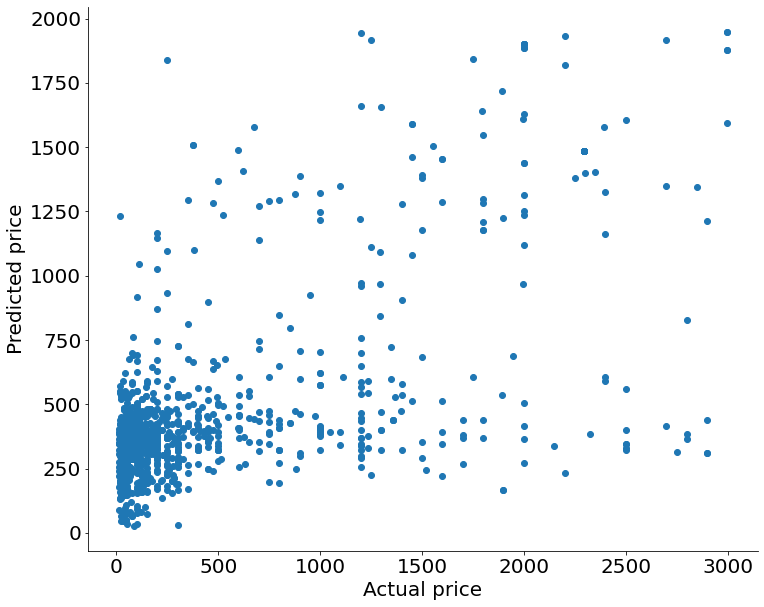

In [78]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_pred['Actual'], df_pred['Predicted'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)

sns.despine()

<AxesSubplot:>

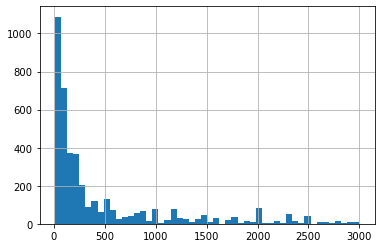

In [79]:
df['price'].hist(bins=50)

In [80]:
#import statsmodels.api as sm
# X_train = sm.add_constant(X_train) # adding a constant
# X_test = sm.add_constant(X_test) # adding a constant
#
#
#model = sm.OLS(y_train, X_train).fit()
#predictions = model.predict(X_test)
#
#print_model = model.summary()
# print(print_model)

# KNN

In [81]:
rmse_val = []  # to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
fit_df = pd.DataFrame({'k': range(1, 41), 'RMSE': rmse_val}).set_index('k')
display(fit_df)
best_k = int(fit_df.idxmin())
best_k

,RMSE
k,
1,597.293299
2,552.617977
3,527.386105
4,544.412648
5,545.253002
6,538.652830
7,533.081365
8,529.927118
9,526.512823


16

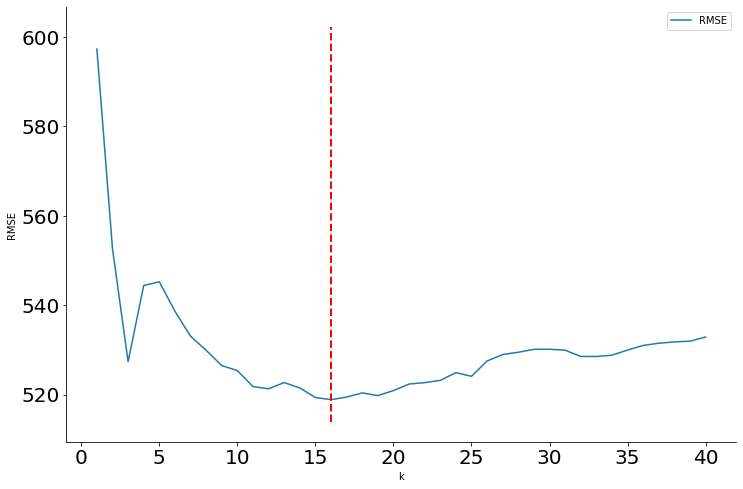

In [82]:
fit_df.plot(ylabel='RMSE', figsize=[12, 8], fontsize=20)
plt.plot([best_k, best_k], [fit_df['RMSE'].min()-5, fit_df['RMSE'].max()+5], color='red',
         linestyle='dashed', linewidth=2)

sns.despine()

In [83]:
model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, y_train)  # fit the model
pred_KNN = model.predict(X_test)

In [84]:
df_pred_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred_KNN})
df_pred_KNN = df_pred_KNN[(df_pred_KNN['Predicted'] > 20) & (
    df_pred_KNN['Predicted'] < 2000)]
df_pred_KNN

,Actual,Predicted
152,195.0,224.7500
684,699.0,538.8750
2902,100.0,193.1250
3047,125.0,240.3125
899,100.0,158.8750
...,...,...
737,1200.0,714.3750
888,1199.0,997.8125
803,225.0,180.6250
3799,250.0,314.6875


In [85]:
# Linear Regression vs KNN
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))

RMSE for linear regression :  520.1710964457067
RMSE for KNN with best K :  518.8862646629436


# Random Forest Regression

In [86]:
#from sklearn.model_selection import GridSearchCV
#
# grid = {
#    'n_estimators': [200,300,400,500],
#    'max_features': ['sqrt','log2'],
#    'max_depth' : [3,4,5,6,7],
#    'random_state' : [52]
# }
# Grid Search function
#CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
#CV_rfr.fit(X_train, y_train)
#

In [87]:
# CV_rfr.best_params_

# Output is :

'''
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 52}
 '''

"\n{'max_depth': 7,\n 'max_features': 'sqrt',\n 'n_estimators': 500,\n 'random_state': 52}\n "

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_features='sqrt',
                           max_depth=7, random_state=52).fit(X_train, y_train)
pred_RF = rf.predict(X_test)
mse = mean_squared_error(y_test, pred_RF)
rmse = mse**.5
print(rmse)

502.955356148623


In [89]:
df_pred_RF = pd.DataFrame({'Actual': y_test, 'Predicted': pred_RF})
df_pred_RF = df_pred_RF[(df_pred_RF['Predicted'] > 20)
                        & (df_pred_RF['Predicted'] < 2000)]
df_pred_RF

,Actual,Predicted
152,195.0,443.535558
684,699.0,340.672197
2902,100.0,367.224285
3047,125.0,354.973286
899,100.0,338.914116
...,...,...
737,1200.0,442.728336
888,1199.0,441.298834
803,225.0,270.850406
3799,250.0,425.276567


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

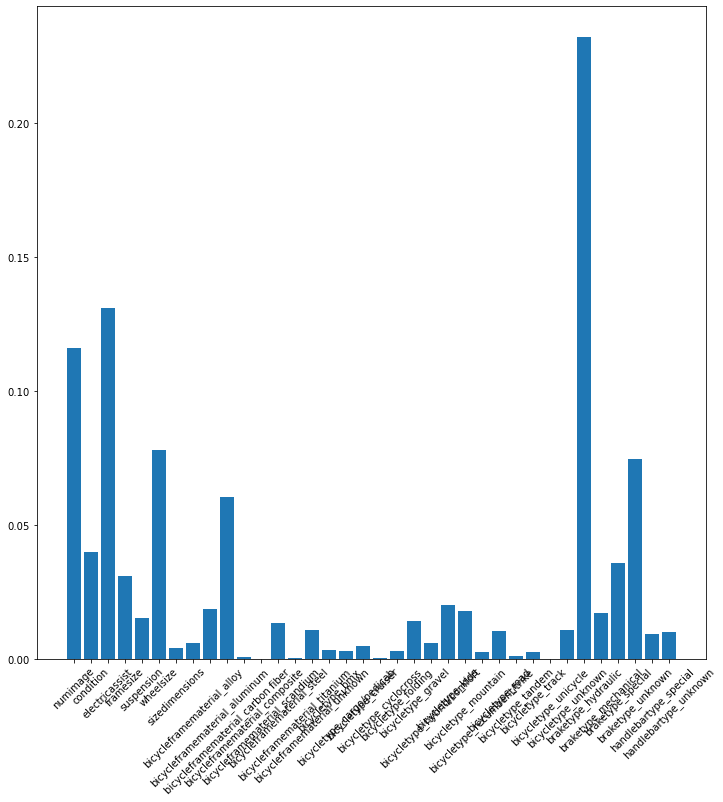

In [90]:
plt.figure(figsize=(12,12))
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=45)

# Sum-up

In [91]:
# Linear Regression vs KNN vs RF
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))
print('RMSE for RF with best params : ', sqrt(
    mean_squared_error(y_test, pred_RF)))


RMSE for linear regression :  520.1710964457067
RMSE for KNN with best K :  518.8862646629436
RMSE for RF with best params :  502.955356148623


In [92]:
df_pred_sum_up = pd.DataFrame({'Actual': y_test,'Predicted with Linear Regression':y_pred,'Predicted with KNN k ='+str(best_k):pred_KNN,'Predicted with Random Forest': pred_RF})
average_pred = df_pred_sum_up.drop("Actual",axis=1).mean(axis=1)
df_pred_sum_up['Average']=average_pred

df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Linear Regression'] > 20)
                        & (df_pred_sum_up['Predicted with Linear Regression'] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with KNN k ='+str(best_k)] > 20)
                        & (df_pred_sum_up['Predicted with KNN k ='+str(best_k)] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Random Forest'] > 20)
                        & (df_pred_sum_up['Predicted with Random Forest'] < 2000)]

df_pred_sum_up.reset_index().drop('index',axis=1)

,Actual,Predicted with Linear Regression,Predicted with KNN k =16,Predicted with Random Forest,Average
0,195.0,410.612129,224.7500,443.535558,359.632562
1,699.0,354.097338,538.8750,340.672197,411.214845
2,100.0,627.197089,193.1250,367.224285,395.848791
3,125.0,189.148405,240.3125,354.973286,261.478064
4,100.0,369.859586,158.8750,338.914116,289.216234
...,...,...,...,...,...
995,350.0,1292.896908,1032.1875,1069.982580,1131.688996
996,1200.0,464.433071,714.3750,442.728336,540.512136
997,1199.0,448.670823,997.8125,441.298834,629.260719
998,225.0,135.294867,180.6250,270.850406,195.590091


In [93]:
print('RMSE for Average : ', sqrt(
    mean_squared_error(y_test, average_pred)))

RMSE for Average :  500.6022110204755


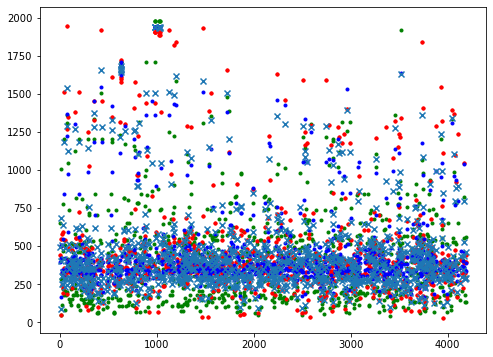

In [94]:
x = df_pred_sum_up.index

fig = plt.figure(figsize=(8,6))  #setting the figure size
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 

plt.scatter(x, df_pred_sum_up['Predicted with KNN k ='+str(best_k)],marker='.',color='g') 
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 
plt.scatter(x, df_pred_sum_up['Predicted with Random Forest'],marker='.',color='b') 
plt.scatter(x,df_pred_sum_up['Average'],marker='x')

plt.show()